# Home Assignment No. 1: Practice

To solve this task efficiently, here are some practical suggestions:

* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that tutorials, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).


* Instead of rewriting existing code use **BUILT-IN METHODS** available in the libraries. There exists a class/method for almost everything you can imagine (related to this homework).


* To complete this part of the homework, you have to write some **CODE** directly inside the specified places in the notebook **CELLS**.


* In some problems you are asked to provide a short discussion of the results. In these cases you have to create a **MARKDOWN** cell with your comments right after the corresponding code cell.


* For every separate problem, you can get **INTERMEDIATE scores**.


* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if a reviewer executes your code, the output will be the same (with all the corresponding plots) as in your uploaded files. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudo randomness.


* Your code must be readable to any competent reviewer. For this purpose, try to include **necessary** (and not more) comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY**.


* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameter and set it to `-1` to use all the cores.


* **IMPORTANT:** In the end you need to hand in a **single zip file** containing **two notebooks** (theory and practice) as well as the **html exported versions** of these notebooks. That is **4** files in total.


To begin let's import the essential (for this assignment) libraries.

In [13]:
import numpy as np
import numpy.matlib as mnp

# for reproducibility
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from sklearn.preprocessing import StandardScaler

# Numpy and Matplotlib

## Task 1. Numpy Standardization [6 points]

Write a function that takes a matrix (numpy array) as input and returns a matrix in which each **column** is standardized.

Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) out for documentation. You are **only allowed** to use the **numpy** library! You are **not allowed** to use any loops!

In [6]:
def standardize(matrix):
    assert matrix.ndim == 2, "Check the input matrix shape!"
    
    ### BEGIN Solution

    column_standardized_matrix = matrix / matrix.ptp(0)
    
    ### END Solution
    
    return column_standardized_matrix

In [7]:
# This is a simple test to check the your function works as desired

matrix = np.random.randint(low=-10, high=10, size=(3, 2))

assert np.allclose(standardize(matrix),
                   StandardScaler().fit(matrix).transform(matrix),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

AssertionError: Houston, we have a problem!

## Task 2. Statistics [7 points]

Repeat the following experiment **1000 times**:

1. generate two **10 x 10** matrices from the **standard normal distribution**,

2. multiply them (as matrices) and

3. find the **maximum** element.

Draw the **histogram** of max elements.

You are **allowed** to use a **loop** only to repeat the experiment!

In [8]:
def matrix_sampling(n_rows, n_columns):
    """
    Generates a random matrix of size [n_rows, n_columns].
    """
    ### BEGIN Solution
    return np.random.standard_normal((n_rows,n_columns))
    #generated_matrix = np.random.normal(size=(n_rows,n_columns))
    #return generated_matrix
    ### END Solution

In [16]:
def matrix_multiplication(x, y):
    """
    Multipies matrices x and y.
    """
    ### BEGIN Solution
    return np.matmul(x,y)

    ### END Solution

In [10]:
def find_max_element(matrix):
    """
    Returns the maximum element of the matrix.
    """
    ### BEGIN Solution
    return np.amax(matrix)
    #return matrix.max

    ### END Solution

In [11]:
def experiment(n_rows, n_columns):
    """
    Generates 2 random matrices of size [n_rows, n_columns].
    And returns the maximum element of their product.
    Use functions defined above.
    """
    ### BEGIN Solution
    x = matrix_sampling(n_rows, n_columns)
    y = matrix_sampling(n_rows,n_columns)
    max_element = find_max_element(matrix_multiplication(x,y))
    ### END Solution
    
    return max_element

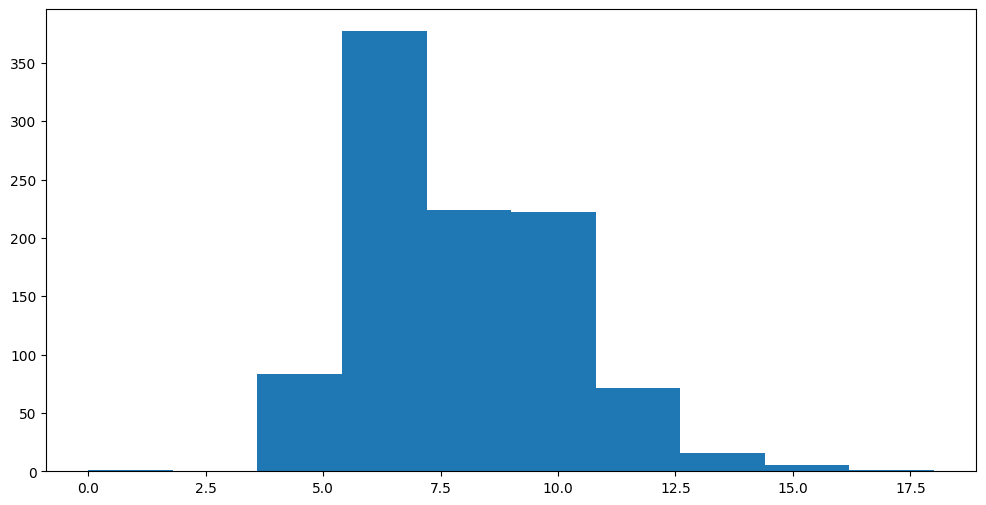

In [17]:
"""
Run the experiment N times and plot the histogram of the max element.
"""

N = 1000
n_rows, n_columns = 10, 10

### BEGIN Solution
#for n in range(N):
 #   plt.bar(experiment(n_rows,n_columns))

max_array = np.arange(N)
i = 1
while i < N:
    max_array[i] = experiment(n_rows,n_columns)
    i= i+1
plt.hist(max_array)

### END Solution

plt.show()

# Logistic Regression

In the **binary classification** problem objects (feature vectors) $\mathbf{x}_{1}, \dots, \mathbf{x}_{m} \in \mathbb{R}^d$ have binary labels $y_{1}, \dots, y_{m} \in \{0, 1\}$.

Using a **linear combination** of the features $\mathbf{\theta}^\top \mathbf{x}$, like in Least Mean Squares, will result in an unbounded estimator. However, we would like to have a mapping $f_{\mathbf{\theta}}: \mathbb{R}^d \to \{0, 1\}$, the output of which can be naturally interpreted as the probability of belonging to class 1.

In **Logistic Regression** the resulting dot-product $\mathbf{\theta}^\top \mathbf{x}$ is converted to the unit interval with the **sigmoid** function:

$$g(z) = \frac{1}{1 + e^{-z}}$$

This gives us the hypothesis function:

$$f_{\mathbf{\theta}}(\mathbf{x}) = g(\mathbf{\theta}^{\top}\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{\theta}^{\top}\mathbf{x}}}$$

Now, we only need to set a **threshold** (for example, 0.5) for classifying an object to the 1st class.

## Task 3. Sigmoid [5 points]

Implement and plot the sigmoid function. 

**Important!** Your function should work for inputs of arbitrary shape. The sigmoid should be applied elementwise. The returned array should have the same shape as the input. 

**Important!!** For large negative input, computing the exponent in the sigmoid may result in overflow. Use an alternative form of the sigmoid for the negative entries of the input to deal with this issue.

**Hint:** An alternative form can be obtained by multiplying the nominator and the denominator of the sigmoid by $e^z$.

In [58]:
def sigmoid(z):
    ### BEGIN Solution
    if (z < 0):
        return np.exp(z)/(np.exp(z) + 1)
    else:
        return 1/(1 + (np.exp(z)))

    ### END Solution

In [59]:
# This should not raise a warning
sigmoid(np.array([-1000]))

array([0.])

In [61]:
z = np.linspace(-10, 10, 100)

plt.figure(figsize=(8, 4))

### BEGIN Solution
plt.plot(z, sigmoid(z))

### END Solution

plt.title('Sigmoid', size=16)

plt.xlabel('z', size=14)
plt.ylabel('sigmoid(z)', size=14)

plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 800x400 with 0 Axes>

Thus, the conditional probabilities of belonging to class 1 or 0 are as follows:

$$\begin{align}
    p(y = 1| \mathbf{x}; \mathbf{\theta}) &= f_{\mathbf{\theta}}(\mathbf{x}) \\
    p(y = 0| \mathbf{x}; \mathbf{\theta}) &= 1 - f_{\mathbf{\theta}}(\mathbf{x})
\end{align}$$

Or one could rewrite it as:

$$p(y| \mathbf{x}; \mathbf{\theta}) = f_{\mathbf{\theta}}(\mathbf{x})^{y}\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x})\bigr]^{1 - y}$$

&nbsp;

Now, to **estimate** the weights $\mathbf{\theta}$, we will **maximize** the **likelihood** function (more precisely, its logarithm for simpler calculations). Therefore, this method is called the **maximum likelihood estimation** (MLE).

$$\ln{\mathcal{L}(\mathbf{\theta})} = \mathcal{l}(\mathbf{\theta}) = \sum\limits_{i = 1}^m p(y_i| \mathbf{x}_i; \mathbf{\theta}) = \sum\limits_{i = 1}^m y_i \ln{\bigl[f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} + (1 - y_i)\ln{\bigl[1 - f_{\mathbf{\theta}}(\mathbf{x}_i) \bigr]} \to \max\limits_{\mathbf{\theta}}$$

## Task 4. Log-Likelihood [4 points]

Let $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^{\top} \\ \vdots \\ \mathbf{x}_m^{\top} \end{bmatrix} \in \mathbb{R}^{m \times d}$ be the data matrix, $\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} \in \mathbb{R}^{m}$ be the labels vector corresponding to $\mathbf{X}$ and $\mathbf{\theta} = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_d \end{bmatrix} \in \mathbb{R}^{d}$ be the parameters vector.

Implement the log-likelihood for Logistic Regression.

**Note:** You have already implemented the sigmoid function. Now it is time to use it.

In [ ]:
def log_likelihood_log_reg(theta, X, y):
    ### BEGIN Solution
    

    ### END Solution

In [ ]:
m = 100
d = 2

X = np.random.randint(low=-10, high=10, size=(m, d))
y = np.random.randint(low=0, high=1, size=(m, 1))
theta = np.zeros((d, 1))

assert np.allclose(log_likelihood_log_reg(theta, X, y),
                   -m * np.log(2),
                   atol=1e-8), "Houston, we have a problem!"
print("Well done!")

## Task 5. Gradient Descent [10 points]

Now, to find the weights $\mathbf{\theta}$, we need to solve the optimization problem described above. Let's use [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

Since the gradient descent solves the **minimization** problem, we will change the maximization problem described above to the minimization problem by changing the sign of the log-likelihood function to negative:

$$\mathcal{l}(\mathbf{\theta}) \to \max\limits_{\mathbf{\theta}} \Longleftrightarrow -\mathcal{l}(\mathbf{\theta}) \to \min\limits_{\mathbf{\theta}}$$

So let's first implement a function to compute the gradient of the **negative** log-likelihood function.

The gradient is a column vector that has **the same shape as** $\mathbf{\theta}$.

In [ ]:
def negative_gradient_log_reg(theta, X, y):
    ### BEGIN Solution
    

    ### END Solution

Now implement the general gradient descent algorithm.

In [ ]:
 def gradient_descent(X, y, gradient, theta_0, alpha=0.01, tolerance=1e-8, max_iters_number=100):
    """
    X: data matrix of shape [m, d]
    y: labels of shape [m]
    gradient: a function to compute the gradient of the neg. log-likelihood
    theta_0: initialization of theta of shape [d]
    alpha: learning rate
    tolerance: a value to detect convergence (if the norm of the update is smaller that tolerance, terminate)
    max_iters_number: maximum number of iterations of the algorithm
    
    return: the final estimation for theta
    """
    if y.ndim == 1:
        y = y[:, np.newaxis]
    
    if theta_0.ndim == 1:
        theta_0 = theta_0[:, np.newaxis]
    
    ### BEGIN Solution
    
    for ...:
        ...
        
        # termination
        if ...:  # some criteria for stopping
            ...
        
    ...
    
    ### END Solution

## Task 6. Classifier [10 points]

Let's create our own classifier class and then compare it with the [existing method in the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We need to implement three principal methods:

* `fit` to find the coefficients (weights) $\mathbf{\theta}$


* `predict` to predict the labels $\mathbf{\hat{y}}$ for the data matrix $\mathbf{X}$


* `score` to evaluate predictions (for example, with **mean accuracy** score)

In [ ]:
def accuracy_score(predictions, labels):
    """
    Returns the accuracy of predictions when compared to the true labels
    """
    assert predictions.shape == labels.shape, "Check shapes!"
    ### BEGIN Solution
    
    
    ### END Solution

In [ ]:
class LogReg(object):
    def __init__(self):
        self.coef_ = None
        
    def fit(self, X, y):
        ### BEGIN Solution
        theta_0 = ...  # initialize with random noise
        
        self.coef_ = ...  # calculate using gradient descent
        
        ### END Solution
        
    def predict(self, X, threshold=0.5):
        ### BEGIN Solution
        
        predictions = ...
        
        ### END Solution
        
        assert predictions.shape == (X.shape[0],), "Check shapes!"
        
        return predictions
    
    def score(self, X, y):
        ### BEGIN Solution
        
        
        ### END Solution

## Task 7. Decision Rule [7 points]

In this task, your goal is to visualize the **decision rule** of **Logistic Regression** applied to a synthetic $2$-dimensional dataset generated by a built-in `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)
print(X.shape, y.shape)

The goal is to fit our LogReg and sklearn's Logistic Regreesion classifiers to this data:

You have to plot the decision regions. The plots must have **titles**, which contain the names of the classifiers and the corresponding accuracy (rounded to only **two** decimal places).

You can write the plotting code on your own, but we highly recommend just to use [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) library (`pip install mlxtend`), which has a awesome one-line decision boundary plotting function.

In [ ]:
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

In [ ]:
my_logistic_regression = LogReg()
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1)

classifiers = [my_logistic_regression, logistic_regression]

In [ ]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    
    # Fit the classifier, and plot the decision regions

    ### END Solution

## Task 8. Feature Engineering [7 points]

In the previous task, classifiers obviously failed fitting to data. This happened because the decision boundary of the classifier has a restricted linear form, while the data is much more complicated.

One may try to change the parameters of the classifier in order to improve accuracy, but linear models do not have parameters that can change the form of the decision rule.

In this case, the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing ones and fit the classifier for the new features. This may help low-complexity classifiers to fit complex data dependencies.

Your task is

* to achieve accuracy $> 0.95$, by generating additional features (e.g. polynomial),


* to plot decision rules in the original feature space,


* to write 2-3 sentences about why you chose these features.

It is your choice how to generate features. You may create hand-crafted features and add them manually.

Nevertheless, we **highly recommend** getting used to and applying the following built-in `sklearn` methods, for example:

* `PolynomialFeatures` for [feature generation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* `StandardScaler`for [feature scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* `Pipeline` - for [combining several operations](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) in a row (e.g. feature creation & prediction)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
logistic_regression_simple = Pipeline([('LR', LogisticRegression(random_state=0, solver='lbfgs', n_jobs=-1))])

### BEGIN Solution

logistic_regression_advanced = ...

### END Solution

classifiers = [logistic_regression_simple, logistic_regression_advanced]

In [ ]:
# plotting

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))

for classifier, axis in zip(classifiers, axes.flat):
    ### BEGIN Solution
    
    # Fit the classifier, and plot the decision regions
    
    ### END Solution

Why did you choose these features?

# Face classification



In this task you will face a real-life problem of face detection. You have to train a model to classify 24$\times$24 grayscale images to *face*/*non-face* classes.
First, let us import some libraries and load the data.

In [ ]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0  # Want labels in {0, 1}
data = data['Data']
data.shape

Each datapoint is a 576-dimentional vector that stores pixel intensities of a flattened grayscale image.
If carefully reshaped, one can visualize the datapoints as 24$\times$24 images.

In [ ]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
imgs = np.reshape(data, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(labels, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Now let us split the dataset into train and test. This will allow to assess the ability of our models to generalize to unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

## Task 9. Logistic Regression for Face Classification [5 points]

Now fit your *LogReg* class on *(X_train, y_train)* and report the accuracy on both the **train** and **test** sets.

**Warning:** It may take time to fit your model to this amount of data.

In [ ]:
### BEGIN Solution


### END Solution

Visualize the learned coefficients in a shape of a 24$\times$24 grayscale image.

In [ ]:
### BEGIN Solution


### END Solution

## Task 10. Linear Discriminant Analysis for Face Classification [10 points]

From the lectures you've learned about another linear model for classification, Linear (Gaussian) Discriminant Analysis.
In this task you are asked to implement that model and fit it to the face dataset. Report the accuracy of your implementation on the training/test sets and compare it to the build-in sklearn model (*sklearn.discriminant_analysis.LinearDiscriminantAnalysis*).

In [ ]:
class LDA(object):
    def __init__(self):
        self.coef_ = None
        self.bias_ = None
        
    def fit(self, X, y):
        """
        X: Data matrix of shape [m, num_features]
        y: Labels corresponding to X of shape [m,]
        """
        
        phi = None  # The prior probability of the first class
        mu_0 = None  # The mean of the first class
        mu_1 = None  # The mean of the second class
        sigma = None  # The shared covariance matrix
        
        ### BEGIN Solution
        
        # Estimate the values of phi, mu_0, mu_1 and sigma from the data
        
        ### END Solution
        
        # Compute the coefs from the results of GDA
        sigma_inv = np.linalg.inv(sigma)
        quad_form = lambda A, x: np.dot(x.T, np.dot(A, x))
        self.bias_ = 0.5 * quad_form(sigma_inv, mu_0) - 0.5 * quad_form(sigma_inv, mu_1) + np.log(phi / (1 - phi))
        self.coef_ = np.dot(sigma_inv, (mu_1 - mu_0))

        
    def predict(self, X, threshold=0.5):
        ### BEGIN Solution
        
        predictions = ...
        
        ### END Solution
        
        return predictions
    
    def score(self, X, y):
        ### BEGIN Solution
        
        # Compute the accuracy of the classifier on X, y
        
        ### END Solution

In [ ]:
lda = LDA()
lda.fit(X_train, y_train)

print("Train accuracy:", lda.score(X_train, y_train))
print("Test accuracy:", lda.score(X_test, y_test))

Visualize the learned coefficients in a shape of a 24$\times$24 grayscale image.

In [ ]:
### BEGIN Solution


### END Solution

## Task 11. Tuning the model [5 points]

The final task is to build a model that reaches as high accuracy on the test set as possible.
Feel free to use anything that you already know from the lectures/tutorials/this assignment by the time this assignment was given (i.e. the 4th week).

Justify your final choice of the model.